In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/archive (5).zip')
df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Bankrupt?'].value_counts(normalize=True)

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

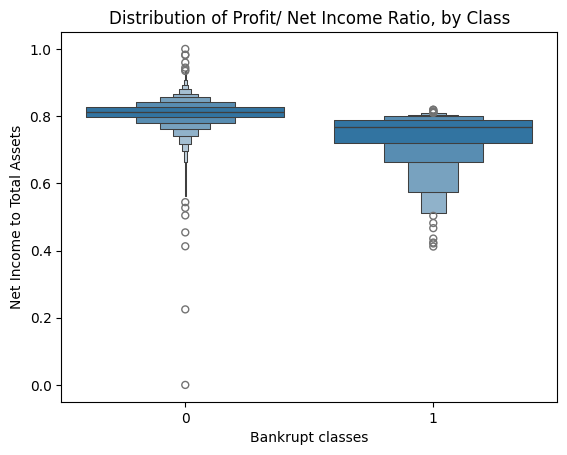

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot net income to total assets by classes
sns.boxenplot(x="Bankrupt?" , y=" Net Income to Total Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class");

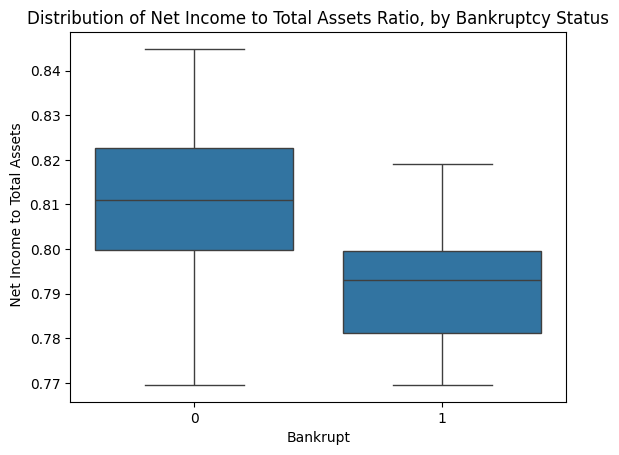

In [ ]:
q1 , q9 = df[' Net Income to Total Assets'].quantile([0.1,0.9])
mask = df[" Net Income to Total Assets"].between(q1 , q9)
sns.boxplot(x='Bankrupt?' , y=' Net Income to Total Assets', data= df[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Net Income to Total Assets")
plt.title("Distribution of Net Income to Total Assets Ratio, by Bankruptcy Status");

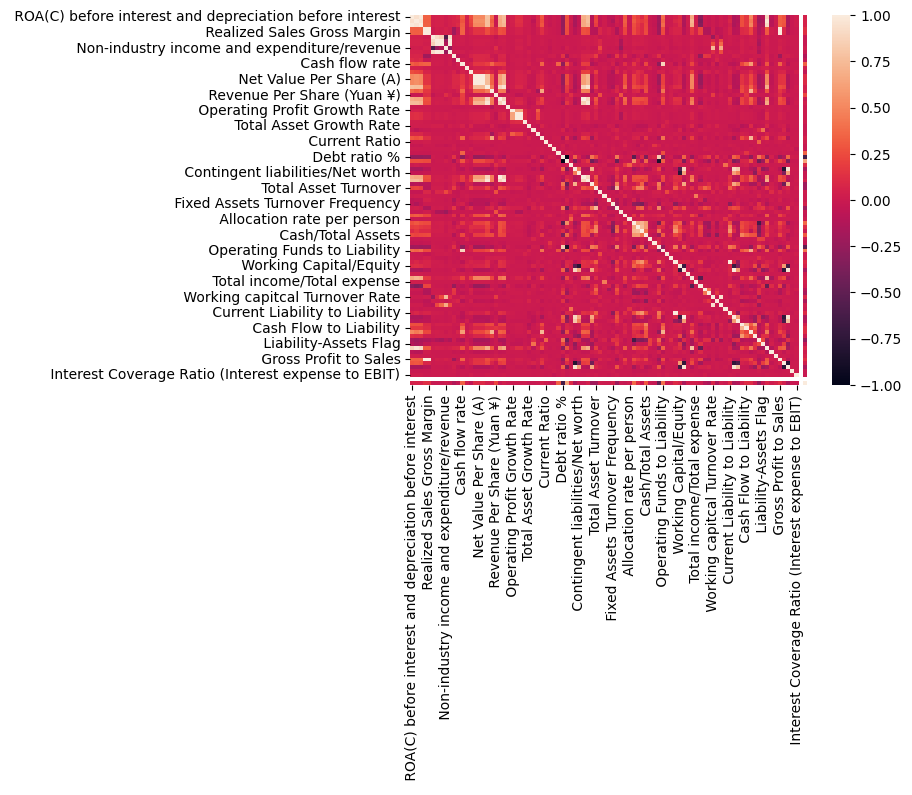

In [ ]:
corr = df.drop(columns=['Bankrupt?']).corr()
sns.heatmap(corr);


In [ ]:
target = "Bankrupt?"
X = df.drop(columns=[target])
y = df[target]

# Split train and test set
from sklearn.model_selection import train_test_split , GridSearchCV
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


In [ ]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Build model
rand_forest = RandomForestClassifier(random_state=42)
params = {
    "n_estimators":range(25 , 100 , 25),
    "max_depth": range(10 , 70 , 10)
    #Add more parameters for tuning
}

grid_search = GridSearchCV(rand_forest, param_grid = params,cv=5)
#,n_jobs=-1,verbose=1

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Access the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
acc_train = best_model.score(X_train, y_train)
acc_test = best_model.score(X_test, y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 1.0
test accuracy: 0.9677


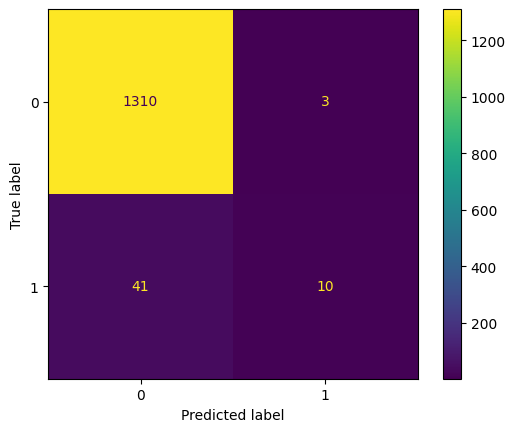

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score

# Evaluate using confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test);

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.77      0.20      0.31        51

    accuracy                           0.97      1364
   macro avg       0.87      0.60      0.65      1364
weighted avg       0.96      0.97      0.96      1364



In [ ]:
features = X_test.columns
importances = best_model.feature_importances_

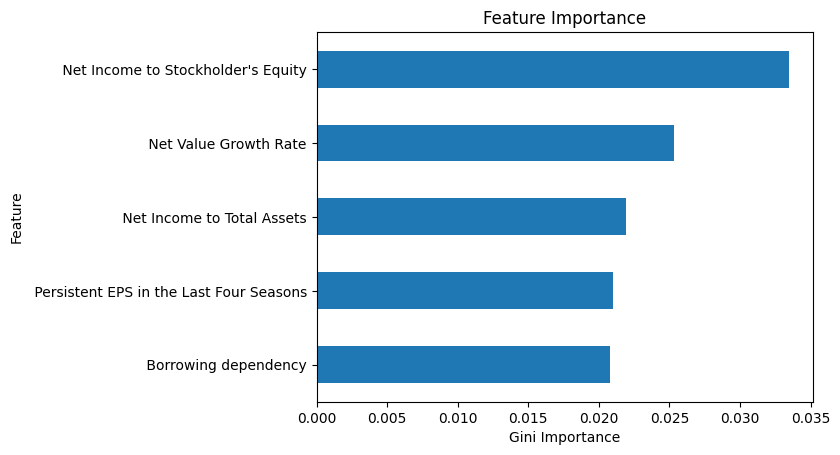

In [ ]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");